<a href="https://colab.research.google.com/github/abosedealli/Stockprediction/blob/main/AR%20sixtydays.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWa

P-value:  0.41674776142924774
                            AutoReg Model Results                             
Dep. Variable:              Adj Close   No. Observations:                  102
Model:                     AutoReg(8)   Log Likelihood                -469.562
Method:               Conditional MLE   S.D. of innovations             35.745
Date:                Mon, 30 Jan 2023   AIC                            959.125
Time:                        01:19:30   BIC                            984.558
Sample:                             8   HQIC                           969.398
                                  102                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const          347.3875     95.251      3.647      0.000     160.699     534.076
Adj Close.L1    -0.0287      0.102     -0.280      0.779      -0.229       0.172
Adj Close.L2  

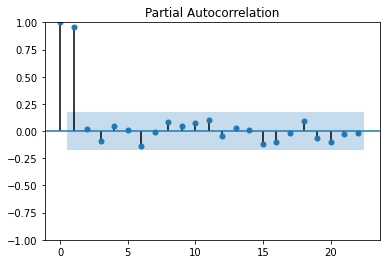

In [13]:
!pip install pmdarima
!pip  install pandas
!pip install yfinance
from pmdarima.arima import auto_arima

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import seaborn as sns

from statsmodels.tsa.ar_model import AutoReg, ar_select_order
from sklearn.model_selection import train_test_split
data = pd.read_csv('/content/newntflixs.csv')
a_df = stock_data['Adj Close']
a_df = pd.DataFrame(a_df)

import statsmodels.tsa.stattools as sts
from statsmodels.tsa.stattools import adfuller

df_stationarityTest = adfuller(a_df['Adj Close'], autolag='AIC')
train_df = a_df.sample(frac=0.8, random_state=25)
test_df = a_df.drop(train_df.index)

from statsmodels.tsa.ar_model import AutoReg

model = AutoReg(train_df, lags=50)  # use time span of 1 year for lagging
trained_model = model.fit()

trained_model = AutoReg(train_df, 50).fit(cov_type="HC0")

print("P-value: ", df_stationarityTest[1])

ar_model = AutoReg(train_df, lags=8).fit()
print(ar_model.summary())

from statsmodels.graphics.tsaplots import plot_pacf
pacf = plot_pacf(a_df)


# Define start and end for prediction 
start = len(train_df)
end = len(train_df) + len(test_df) - 1

prediction = ar_model.predict(start=start, end=end+100, dynamic=True)

#  RMSE and MAPE  we will Calculate the RMSE and MAPE values
rmse = np.sqrt(np.mean((prediction - test_df['Adj Close'])**2))
mse=(np.mean((prediction - test_df['Adj Close'])**2))
mape = np.mean(np.abs(prediction - test_df['Adj Close']) / test_df['Adj Close'])
mae= np.mean(np.abs(prediction - test_df['Adj Close']))

print("RMSE:", rmse)
print("MAPE:", mape)
print("MSE:", mse)
print("MAE:", mae)